In [108]:
import os
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)
import seaborn as sns
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')

In [109]:
train = pd.read_csv("LSTM_DATA.csv", engine="python", encoding="utf-8", index_col=0)
train["date_time"] = train["date_time"].astype("datetime64")
train["Month"] = train["date_time"].dt.month
train.drop(columns="date_time",axis=1,inplace=True)
train

,num,전력사용량(kWh),기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),비전기냉방설비운영,태양광보유,hour,day,건물용도,Month
0,1,8179.056,17.6,2.5,92.0,0.8,0.0,0,0,0,0,3,6
1,1,8135.640,17.7,2.9,91.0,0.3,0.0,0,0,1,0,3,6
2,1,8107.128,17.5,3.2,91.0,0.0,0.0,0,0,2,0,3,6
3,1,8048.808,17.1,3.2,91.0,0.0,0.0,0,0,3,0,3,6
4,1,8043.624,17.0,3.3,92.0,0.0,0.0,0,0,4,0,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
122395,60,4114.368,27.8,2.3,68.0,0.0,0.7,1,1,19,0,2,8
122396,60,3975.696,27.3,1.2,71.0,0.0,0.0,1,1,20,0,2,8
122397,60,3572.208,27.3,1.8,71.0,0.0,0.0,1,1,21,0,2,8
122398,60,3299.184,27.1,1.8,74.0,0.0,0.0,1,1,22,0,2,8


In [110]:
train_num = train[train['num']==1]

In [111]:
train_num

,num,전력사용량(kWh),기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),비전기냉방설비운영,태양광보유,hour,day,건물용도,Month
0,1,8179.056,17.6,2.5,92.0,0.8,0.0,0,0,0,0,3,6
1,1,8135.640,17.7,2.9,91.0,0.3,0.0,0,0,1,0,3,6
2,1,8107.128,17.5,3.2,91.0,0.0,0.0,0,0,2,0,3,6
3,1,8048.808,17.1,3.2,91.0,0.0,0.0,0,0,3,0,3,6
4,1,8043.624,17.0,3.3,92.0,0.0,0.0,0,0,4,0,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2035,1,8714.952,29.4,3.4,66.0,0.0,0.2,0,0,19,0,3,8
2036,1,8740.224,28.7,1.9,69.0,0.0,0.0,0,0,20,0,3,8
2037,1,8730.504,28.3,1.1,71.0,0.0,0.0,0,0,21,0,3,8
2038,1,8725.968,28.3,2.4,72.0,0.0,0.0,0,0,22,0,3,8


In [112]:
train_num.corr()

,num,전력사용량(kWh),기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),비전기냉방설비운영,태양광보유,hour,day,건물용도,Month
num,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
전력사용량(kWh),NaN,1.000000,0.637313,0.057756,-0.007981,0.001241,0.064190,NaN,NaN,2.616277e-01,2.603544e-02,NaN,3.760547e-01
기온(°C),NaN,0.637313,1.000000,0.141183,-0.529771,-0.113308,0.504956,NaN,NaN,3.626770e-01,5.447565e-02,NaN,2.649599e-01
풍속(m/s),NaN,0.057756,0.141183,1.000000,-0.115921,0.189296,0.158611,NaN,NaN,2.601605e-01,-6.527439e-02,NaN,9.010069e-04
습도(%),NaN,-0.007981,-0.529771,-0.115921,1.000000,0.266364,-0.636673,NaN,NaN,-2.907501e-01,-2.431912e-02,NaN,4.818763e-01
강수량(mm),NaN,0.001241,-0.113308,0.189296,0.266364,1.000000,-0.114833,NaN,NaN,-3.166238e-02,-3.673860e-02,NaN,1.413194e-01
일조(hr),NaN,0.064190,0.504956,0.158611,-0.636673,-0.114833,1.000000,NaN,NaN,1.577806e-01,2.557389e-02,NaN,-2.308688e-01
비전기냉방설비운영,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
태양광보유,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hour,NaN,0.261628,0.362677,0.260160,-0.290750,-0.031662,0.157781,NaN,NaN,1.000000e+00,-2.622845e-17,NaN,3.327350e-17


In [113]:
nc = train_num.corr()[train_num.corr()["전력사용량(kWh)"].isna() == True].index.values

In [114]:
nc

array(['num', '비전기냉방설비운영', '태양광보유', '건물용도'], dtype=object)

In [115]:
train_num

,num,전력사용량(kWh),기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),비전기냉방설비운영,태양광보유,hour,day,건물용도,Month
0,1,8179.056,17.6,2.5,92.0,0.8,0.0,0,0,0,0,3,6
1,1,8135.640,17.7,2.9,91.0,0.3,0.0,0,0,1,0,3,6
2,1,8107.128,17.5,3.2,91.0,0.0,0.0,0,0,2,0,3,6
3,1,8048.808,17.1,3.2,91.0,0.0,0.0,0,0,3,0,3,6
4,1,8043.624,17.0,3.3,92.0,0.0,0.0,0,0,4,0,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2035,1,8714.952,29.4,3.4,66.0,0.0,0.2,0,0,19,0,3,8
2036,1,8740.224,28.7,1.9,69.0,0.0,0.0,0,0,20,0,3,8
2037,1,8730.504,28.3,1.1,71.0,0.0,0.0,0,0,21,0,3,8
2038,1,8725.968,28.3,2.4,72.0,0.0,0.0,0,0,22,0,3,8


In [116]:
train_num.drop(columns=nc, axis=1, inplace=True)

In [117]:
train_num

,전력사용량(kWh),기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),hour,day,Month
0,8179.056,17.6,2.5,92.0,0.8,0.0,0,0,6
1,8135.640,17.7,2.9,91.0,0.3,0.0,1,0,6
2,8107.128,17.5,3.2,91.0,0.0,0.0,2,0,6
3,8048.808,17.1,3.2,91.0,0.0,0.0,3,0,6
4,8043.624,17.0,3.3,92.0,0.0,0.0,4,0,6
...,...,...,...,...,...,...,...,...,...
2035,8714.952,29.4,3.4,66.0,0.0,0.2,19,0,8
2036,8740.224,28.7,1.9,69.0,0.0,0.0,20,0,8
2037,8730.504,28.3,1.1,71.0,0.0,0.0,21,0,8
2038,8725.968,28.3,2.4,72.0,0.0,0.0,22,0,8


# 데이터 검사 및 정리

In [118]:
train_num.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
전력사용량(kWh),2040.0,8543.273488,130.265187,7784.424,8486.046,8555.868,8612.568,8827.704
기온(°C),2040.0,24.608578,3.267733,14.800,22.400,24.600,26.700,35.200
풍속(m/s),2040.0,2.345980,1.111222,0.000,1.600,2.200,3.000,7.900
습도(%),2040.0,75.971569,15.694739,27.000,65.000,79.000,89.000,100.000
강수량(mm),2040.0,0.493873,2.309268,0.000,0.000,0.000,0.000,28.600
일조(hr),2040.0,0.184608,0.343522,0.000,0.000,0.000,0.100,1.000
hour,2040.0,11.500000,6.923884,0.000,5.750,11.500,17.250,23.000
day,2040.0,2.964706,2.014837,0.000,1.000,3.000,5.000,6.000
Month,2040.0,6.929412,0.794116,6.000,6.000,7.000,8.000,8.000


In [119]:
train_num.iloc[:,1]

0       17.6
1       17.7
2       17.5
3       17.1
4       17.0
        ... 
2035    29.4
2036    28.7
2037    28.3
2038    28.3
2039    28.1
Name: 기온(°C), Length: 2040, dtype: float64

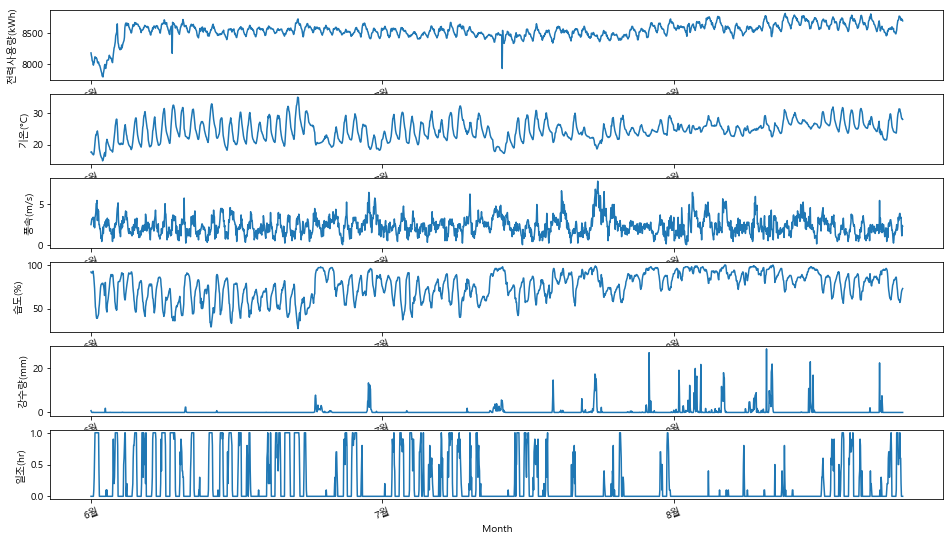

In [120]:
x = np.arange(0,2040,1)
plt.figure(figsize=(16, 9))
for i in np.arange(0,6,1) :
    plt.subplot(6,1,i+1)
    sns.lineplot(y=train_num.iloc[:,i],x=x)
    plt.xlabel('Month')
    plt.xticks(np.arange(0,2040,24*30.5), ['6월', '7월', '8월'],rotation=20)
    plt.ylabel(train_num.columns[i])
plt.show()

In [121]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train_num.drop('전력사용량(kWh)', 1), 
                                                    train_num['전력사용량(kWh)'], test_size=0.2, random_state=0, shuffle=False)

In [122]:
x_train.shape, y_train.shape

((1632, 8), (1632,))

In [123]:
x_train

,기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),hour,day,Month
0,17.6,2.5,92.0,0.8,0.0,0,0,6
1,17.7,2.9,91.0,0.3,0.0,1,0,6
2,17.5,3.2,91.0,0.0,0.0,2,0,6
3,17.1,3.2,91.0,0.0,0.0,3,0,6
4,17.0,3.3,92.0,0.0,0.0,4,0,6
...,...,...,...,...,...,...,...,...
1627,25.5,1.6,76.0,0.0,0.0,19,4,8
1628,25.4,1.1,79.0,0.0,0.0,20,4,8
1629,25.2,2.2,80.0,0.0,0.0,21,4,8
1630,24.8,3.1,81.0,0.0,0.0,22,4,8


# 정규화
## 데이터 이상치 확인

In [124]:
x_train_mean = x_train.mean()
x_train_std = x_train.std()

x_train = (x_train - x_train_mean) / x_train_std
x_test = (x_test - x_train_mean) / x_train_std

In [125]:
y_train_mean = y_train.mean()
y_train_std = y_train.std()

y_train = (y_train - y_train_mean) / y_train_std
y_test = (y_test - y_train_mean) / y_train_std

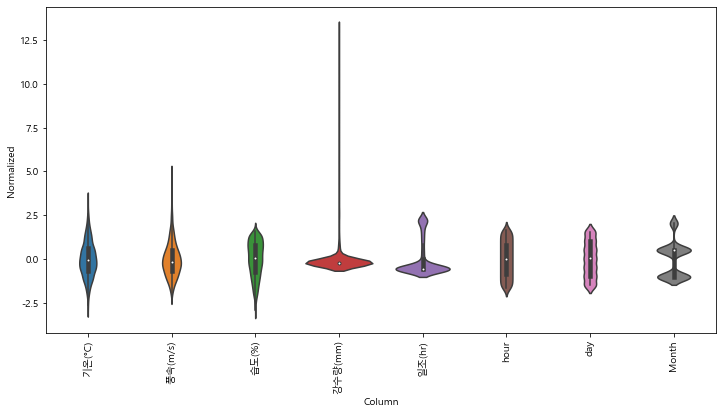

In [126]:
normalized_train = x_train.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=normalized_train)
_ = ax.set_xticklabels(x_train.keys(), rotation=90)

# 데이터 처리

In [127]:
x_train

,기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),hour,day,Month
0,-1.976665,0.106866,1.120295,0.188915,-0.557511,-1.660816,-1.477437,-1.009208
1,-1.946445,0.459376,1.058332,-0.058286,-0.557511,-1.516397,-1.477437,-1.009208
2,-2.006885,0.723759,1.058332,-0.206607,-0.557511,-1.371978,-1.477437,-1.009208
3,-2.127765,0.723759,1.058332,-0.206607,-0.557511,-1.227559,-1.477437,-1.009208
4,-2.157985,0.811886,1.120295,-0.206607,-0.557511,-1.083141,-1.477437,-1.009208
...,...,...,...,...,...,...,...,...
1627,0.410710,-0.686283,0.128898,-0.206607,-0.557511,1.083141,0.541975,2.040842
1628,0.380490,-1.126921,0.314785,-0.206607,-0.557511,1.227559,0.541975,2.040842
1629,0.320050,-0.157517,0.376747,-0.206607,-0.557511,1.371978,0.541975,2.040842
1630,0.199170,0.635631,0.438710,-0.206607,-0.557511,1.516397,0.541975,2.040842


In [128]:
window_size = 7
ds_x = tf.data.Dataset.from_tensor_slices(x_train)
ds_x = ds_x.window(window_size,stride=1, shift=1, drop_remainder=True)
ds_x = ds_x.flat_map(lambda x: x.batch(window_size))

In [129]:
ds_y = tf.data.Dataset.from_tensor_slices(y_train[window_size:])

In [130]:
train_data = tf.data.Dataset.zip((ds_x,ds_y)).batch(1600)

In [131]:
for x, y in train_data.take(1):
    print(x[1])
    print("--------")
    print(y)

tf.Tensor(
[[-1.94644506  0.45937591  1.05833228 -0.05828629 -0.55751137 -1.51639695
  -1.47743744 -1.00920753]
 [-2.00688492  0.7237587   1.05833228 -0.20660731 -0.55751137 -1.3719782
  -1.47743744 -1.00920753]
 [-2.12776465  0.7237587   1.05833228 -0.20660731 -0.55751137 -1.22755944
  -1.47743744 -1.00920753]
 [-2.15798458  0.8118863   1.12029455 -0.20660731 -0.55751137 -1.08314068
  -1.47743744 -1.00920753]
 [-2.18820451  0.9000139   1.18225682 -0.20660731 -0.55751137 -0.93872192
  -1.47743744 -1.00920753]
 [-2.24864438  0.9000139   0.99637001 -0.15716697 -0.55751137 -0.79430317
  -1.47743744 -1.00920753]
 [-2.18820451 -0.06938968  0.74852093 -0.20660731 -0.27858478 -0.64988441
  -1.47743744 -1.00920753]], shape=(7, 8), dtype=float64)
--------
tf.Tensor(
[-3.92595709 -3.91064286 -3.42058754 ...  0.4692266   0.34671277
  0.14762779], shape=(1600,), dtype=float64)


In [132]:
def windowed_dataset(x,y, window_size, batch_size, shuffle):
    # Dataset으로 변환
    ds_x = tf.data.Dataset.from_tensor_slices(x)
    # x일의 데이트를 통해 -> x+1일을 예측 shirh=1일, stride = 간격, drop_remainder = 끝 맞추기
    ds_x = ds_x.window(window_size, shift=1, drop_remainder=True)
    ds_x = ds_x.flat_map(lambda x : x.batch(window_size))
    ds_y = tf.data.Dataset.from_tensor_slices(y[window_size:])
    ds = tf.data.Dataset.zip((ds_x,ds_y))
    if shuffle:
        ds = ds.shuffle(1000)
    #                  미리 배치 하는 갯수 
    return ds.batch(batch_size).prefetch(1)

In [133]:
train_data = windowed_dataset(x_train, y_train, window_size=7, batch_size=32, shuffle=True)
test_data = windowed_dataset(x_test, y_test, window_size=7, batch_size=32, shuffle=False)

In [134]:
for data in train_data.take(3):
    print(f"데이터셋(X) 구성(batch_size, window_size, feature갯수): {data[0].shape}")
    print(f"데이터셋(Y) 구성(batch_size, window_size, feature갯수): {data[1].shape}")

데이터셋(X) 구성(batch_size, window_size, feature갯수): (32, 7, 8)
데이터셋(Y) 구성(batch_size, window_size, feature갯수): (32,)
데이터셋(X) 구성(batch_size, window_size, feature갯수): (32, 7, 8)
데이터셋(Y) 구성(batch_size, window_size, feature갯수): (32,)
데이터셋(X) 구성(batch_size, window_size, feature갯수): (32, 7, 8)
데이터셋(Y) 구성(batch_size, window_size, feature갯수): (32,)


In [135]:
train_data

<PrefetchDataset shapes: ((None, None, 8), (None,)), types: (tf.float64, tf.float64)>

# 모델링 cnn+lstm

In [136]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Conv1D, Lambda
from tensorflow.keras.losses import Huber
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

model = Sequential()
    #1차원
model.add(Conv1D(filters=32,kernel_size=5,padding="causal",activation="relu",input_shape=[7,8]))
model.add(LSTM(16, activation='tanh'))
model.add(Dense(16, activation="relu"))
model.add(Dense(1))


In [137]:
model.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_17 (Conv1D)           (None, 7, 32)             1312      
_________________________________________________________________
lstm_16 (LSTM)               (None, 16)                3136      
_________________________________________________________________
dense_32 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_33 (Dense)             (None, 1)                 17        
Total params: 4,737
Trainable params: 4,737
Non-trainable params: 0
_________________________________________________________________


In [138]:
loss = Huber()
optimizer = Adam(0.0005)
model.compile(loss=Huber(), optimizer=optimizer, metrics=['mse'])

In [139]:
# earlystopping은 10번 epoch통안 val_loss 개선이 없다면 학습을 멈춥니다.
earlystopping = EarlyStopping(monitor='val_loss', patience=10)
# val_loss 기준 체크포인터도 생성합니다.
filename = os.path.join('tmp', 'ckeckpointer.ckpt')
checkpoint = ModelCheckpoint(filename, 
                             save_weights_only=True, 
                             save_best_only=True, 
                             monitor='val_loss', 
                             verbose=1)

In [140]:
history = model.fit(train_data, 
                    validation_data=(test_data), 
                    epochs=50, 
                    callbacks=[checkpoint, earlystopping])

Epoch 1/50
51/51 [==============================] - 2s 11ms/step - loss: 0.2597 - mse: 0.8062 - val_loss: 0.3561 - val_mse: 0.7636

Epoch 00001: val_loss improved from inf to 0.35615, saving model to tmp\ckeckpointer.ckpt
Epoch 2/50
51/51 [==============================] - 0s 4ms/step - loss: 0.2034 - mse: 0.6466 - val_loss: 0.2085 - val_mse: 0.4264

Epoch 00002: val_loss improved from 0.35615 to 0.20850, saving model to tmp\ckeckpointer.ckpt
Epoch 3/50
51/51 [==============================] - 0s 4ms/step - loss: 0.1679 - mse: 0.5171 - val_loss: 0.1759 - val_mse: 0.3561

Epoch 00003: val_loss improved from 0.20850 to 0.17591, saving model to tmp\ckeckpointer.ckpt
Epoch 4/50
51/51 [==============================] - 0s 5ms/step - loss: 0.1527 - mse: 0.4380 - val_loss: 0.1582 - val_mse: 0.3187

Epoch 00004: val_loss improved from 0.17591 to 0.15818, saving model to tmp\ckeckpointer.ckpt
Epoch 5/50
51/51 [==============================] - 0s 4ms/step - loss: 0.1421 - mse: 0.3886 - val_loss

In [141]:
model.load_weights(filename)
pred = model.predict(test_data)

In [142]:
pred.shape

(401, 1)

In [143]:
pred

array([[ 1.91796780e-01],
       [ 4.44145530e-01],
       [ 6.27533913e-01],
       [ 7.39477217e-01],
       [ 7.59402990e-01],
       [ 7.56163597e-01],
       [ 5.45766056e-01],
       [ 4.22400713e-01],
       [ 3.82222384e-01],
       [ 5.50152421e-01],
       [ 6.73974156e-01],
       [ 8.14851344e-01],
       [ 8.85953844e-01],
       [ 8.57051194e-01],
       [ 7.73260295e-01],
       [ 6.21308804e-01],
       [ 5.91870606e-01],
       [ 5.60678899e-01],
       [ 4.48921949e-01],
       [ 3.69446605e-01],
       [ 2.31231272e-01],
       [ 1.42872602e-01],
       [ 7.23077357e-02],
       [ 1.20687008e-01],
       [ 2.58195370e-01],
       [ 4.14457709e-01],
       [ 5.07018745e-01],
       [ 4.17977840e-01],
       [ 4.62812036e-01],
       [ 4.74279463e-01],
       [ 4.59816784e-01],
       [ 2.78369308e-01],
       [ 9.77974385e-02],
       [ 4.00126278e-02],
       [ 1.19353317e-01],
       [ 7.71119967e-02],
       [ 2.01179504e-01],
       [ 3.44504237e-01],
       [ 5.3

In [144]:
pred_CL = pred

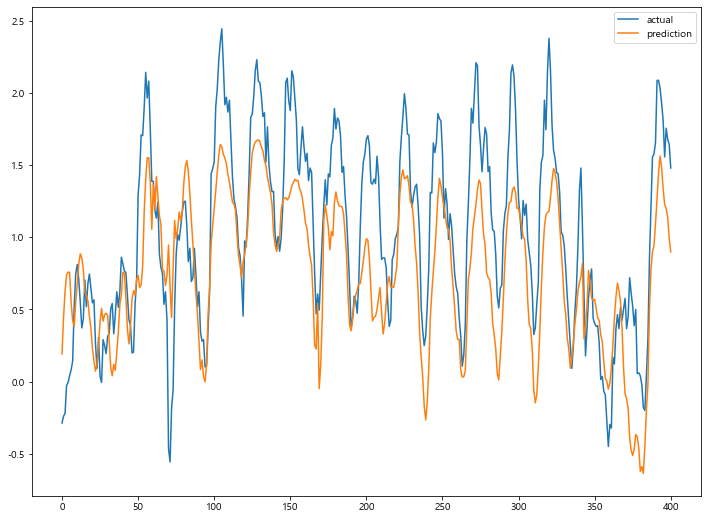

In [145]:
plt.figure(figsize=(12, 9))
plt.plot(np.asarray(y_test)[7:], label='actual')
plt.plot(pred, label='prediction')
plt.legend()
plt.show()

# 모델링 2 Many to one

In [146]:
def windowed_dataset2(x,y, window_size, batch_size):
    # Dataset으로 변환
    ds_x = tf.data.Dataset.from_tensor_slices(x)
    # x일의 데이트를 통해 -> x+1일을 예측 shirh=1일, stride = 간격, drop_remainder = 끝 맞추기
    ds_x = ds_x.window(window_size, shift=1, drop_remainder=True)
    ds_x = ds_x.flat_map(lambda x : x.batch(window_size))
    ds_y = tf.data.Dataset.from_tensor_slices(y[window_size:])
    #                  미리 배치 하는 갯수 
    return ds_x.batch(batch_size).prefetch(1), ds_y.batch(batch_size).prefetch(1)

In [147]:
train_x, train_y = windowed_dataset2(x_train, y_train, window_size=7, batch_size=32)
test_x, test_y = windowed_dataset2(x_test, y_test, window_size=7, batch_size=32)

In [148]:
for data in train_x.take(1):
    print(f"데이터셋(X) 구성(batch_size, window_size, feature갯수): {data[0].shape}")
for data in train_y.take(1):
    print(f"데이터셋(Y) 구성(batch_size, window_size, feature갯수): {data[1].shape}")

데이터셋(X) 구성(batch_size, window_size, feature갯수): (7, 8)
데이터셋(Y) 구성(batch_size, window_size, feature갯수): ()


In [159]:
model = Sequential()
    #1차원
model.add(LSTM(16, activation='tanh',input_shape=[7,8]))
model.add(Dense(16, activation="relu"))
model.add(Dense(1))


In [160]:
loss = Huber()
optimizer = Adam(0.0005)
model.compile(loss=loss, optimizer=optimizer, metrics=['mse'])

In [161]:
# earlystopping은 10번 epoch통안 val_loss 개선이 없다면 학습을 멈춥니다.
earlystopping = EarlyStopping(monitor='val_loss', patience=10)
# val_loss 기준 체크포인터도 생성합니다.
filename = os.path.join('tmp', 'ckeckpointer.ckpt')
checkpoint = ModelCheckpoint(filename, 
                             save_weights_only=True, 
                             save_best_only=True, 
                             monitor='val_acc', 
                             verbose=1)

In [162]:
history = model.fit(train_data, 
                    validation_data=(test_data), 
                    epochs=50, 
                    callbacks=[checkpoint, earlystopping])

Epoch 1/50
51/51 [==============================] - 2s 10ms/step - loss: 0.2695 - mse: 0.8153 - val_loss: 0.4310 - val_mse: 0.9632
Epoch 2/50
51/51 [==============================] - 0s 3ms/step - loss: 0.2189 - mse: 0.6814 - val_loss: 0.3224 - val_mse: 0.6942
Epoch 3/50
51/51 [==============================] - 0s 3ms/step - loss: 0.1950 - mse: 0.6094 - val_loss: 0.2700 - val_mse: 0.5703
Epoch 4/50
51/51 [==============================] - 0s 3ms/step - loss: 0.1814 - mse: 0.5579 - val_loss: 0.2477 - val_mse: 0.5190
Epoch 5/50
51/51 [==============================] - 0s 3ms/step - loss: 0.1710 - mse: 0.5222 - val_loss: 0.2270 - val_mse: 0.4726
Epoch 6/50
51/51 [==============================] - 0s 3ms/step - loss: 0.1626 - mse: 0.4810 - val_loss: 0.2200 - val_mse: 0.4558
Epoch 7/50
51/51 [==============================] - 0s 3ms/step - loss: 0.1531 - mse: 0.4351 - val_loss: 0.2113 - val_mse: 0.4362
Epoch 8/50
51/51 [==============================] - 0s 3ms/step - loss: 0.1448 - mse: 0.4

51/51 [==============================] - 0s 3ms/step - loss: 0.0356 - mse: 0.0810 - val_loss: 0.1406 - val_mse: 0.2835
Epoch 41/50
51/51 [==============================] - 0s 3ms/step - loss: 0.0354 - mse: 0.0805 - val_loss: 0.1428 - val_mse: 0.2880
Epoch 42/50
51/51 [==============================] - 0s 3ms/step - loss: 0.0350 - mse: 0.0798 - val_loss: 0.1454 - val_mse: 0.2931
Epoch 43/50
51/51 [==============================] - 0s 3ms/step - loss: 0.0347 - mse: 0.0793 - val_loss: 0.1358 - val_mse: 0.2736
Epoch 44/50
51/51 [==============================] - 0s 3ms/step - loss: 0.0339 - mse: 0.0776 - val_loss: 0.1426 - val_mse: 0.2875
Epoch 45/50
51/51 [==============================] - 0s 3ms/step - loss: 0.0333 - mse: 0.0764 - val_loss: 0.1374 - val_mse: 0.2767
Epoch 46/50
51/51 [==============================] - 0s 3ms/step - loss: 0.0333 - mse: 0.0764 - val_loss: 0.1312 - val_mse: 0.2640
Epoch 47/50
51/51 [==============================] - 0s 3ms/step - loss: 0.0330 - mse: 0.0759 -

In [153]:
model.load_weights(filename)
pred = model.predict(test_data)

In [154]:
pred.shape

(401, 1)

In [155]:
pred

array([[ 0.05600625],
       [ 0.23618536],
       [ 0.3722145 ],
       [ 0.48473543],
       [ 0.57900715],
       [ 0.5774157 ],
       [ 0.47652632],
       [ 0.4837564 ],
       [ 0.52403295],
       [ 0.571291  ],
       [ 0.63302785],
       [ 0.6753119 ],
       [ 0.6997387 ],
       [ 0.6685859 ],
       [ 0.6052136 ],
       [ 0.41828516],
       [ 0.24820107],
       [ 0.17634052],
       [ 0.12635589],
       [ 0.10912712],
       [ 0.04766646],
       [ 0.0445792 ],
       [ 0.05007378],
       [ 0.12105617],
       [ 0.18387997],
       [ 0.28890604],
       [ 0.41133252],
       [ 0.42607787],
       [ 0.47169077],
       [ 0.5363606 ],
       [ 0.40855312],
       [ 0.20006436],
       [-0.03582085],
       [-0.2592876 ],
       [ 0.12193495],
       [ 0.22966269],
       [ 0.34480467],
       [ 0.4916069 ],
       [ 0.6666537 ],
       [ 0.6789036 ],
       [ 0.6314473 ],
       [ 0.62046754],
       [ 0.75849634],
       [ 0.7897056 ],
       [ 0.64380246],
       [ 0

In [156]:
pred_L = pred

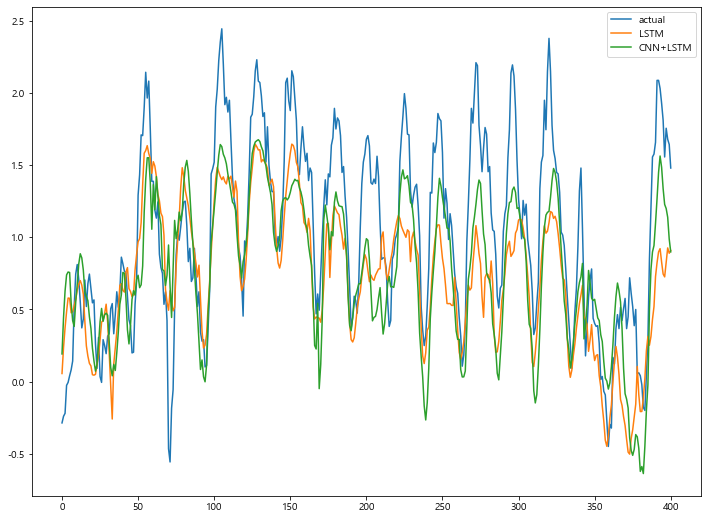

In [158]:
plt.figure(figsize=(12, 9))
plt.plot(np.asarray(y_test)[7:], label='actual')
plt.plot(pred_L, label='LSTM')
plt.plot(pred_CL, label='CNN+LSTM')
plt.legend()
plt.show()